In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader 
from torchvision import datasets,transforms

In [2]:
#Defining the data transformation
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])
#Loading the training dataset
train_dataset=datasets.MNIST(root="./data",train=True,transform=transform,download=True) 
#Loading the testing dataset 
test_dataset=datasets.MNIST(root="./data",train=False,transform=transform,download=True)

In [3]:
#Loading the training dataloader
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=600,shuffle=True) 
#Loading the testing dataloader 
test_loader=torch.utils.data.DataLoader(test_dataset,batch_size=600,shuffle=False)

In [4]:
#Defining the model architecture
class MultilayerPerceptron(nn.Module):
    def __init__(self):
        super(MultilayerPerceptron,self).__init__()
        #Defining the fully connected layers
        self.fc1=nn.Linear(28*28,128)  
        self.fc2=nn.Linear(128,64)     
        self.fc3=nn.Linear(64,10)           
        #Defining the dropout layer 
        self.dropout=nn.Dropout(0.2)
    def forward(self,x):
        #Forward pass
        x=x.view(-1,28*28)
        x=F.relu(self.fc1(x))
        x=self.dropout(x)
        x=F.relu(self.fc2(x))
        x=self.dropout(x)
        x=self.fc3(x)     
        return x

In [5]:
#Instantiating the model
model=MultilayerPerceptron() 
#Displaying the model architecture 
print(model)

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [6]:
#Defining the loss function
criterion=nn.CrossEntropyLoss()
#Defining the optimizer 
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [7]:
epochs=50
train_accuracy=[] 
train_accuracies=0 
train_loss=[] 
train_losses=0.0
test_accuracy=[]  
test_accuracies=0 
test_loss=[] 
test_losses=0.0
#Training the model
model.train()
for i in range(epochs):
    train_correct=0
    train_losses=0.0  
    train_total=0     
    for inputs,labels in train_loader:
        optimizer.zero_grad()
        #Forward pass
        outputs=model(inputs)
        loss=criterion(outputs,labels)
        #Backward pass
        loss.backward()
        optimizer.step()
        train_losses+=loss.item()
        _,predicted=outputs.max(1)
        train_total+=labels.size(0)
        train_correct+=predicted.eq(labels).sum().item()
    train_loss.append(train_losses/len(train_loader))
    train_accuracies=(100*train_correct/train_total) 
    train_accuracy.append(train_accuracies) 
    #Testing the model
    model.eval()
    test_correct=0
    test_losses=0.0       
    test_total=0      
    for inputs,labels in test_loader:
        #Forward pass
        outputs=model(inputs)
        loss=criterion(outputs,labels)
        test_losses+=loss.item()
        _,predicted=outputs.max(1)
        test_total+=labels.size(0)
        test_correct+=predicted.eq(labels).sum().item()
    test_loss.append(test_losses/len(test_loader))
    test_accuracies=(100*test_correct/test_total) 
    test_accuracy.append(test_accuracies)  
    #Displaying the training and testing metrics 
    print(f"Epoch:{i+1:2} Training Accuracy:{train_accuracy[-1]:6.2f}% Training Loss:{train_loss[-1]:6.4f} Testing Accuracy:{test_accuracy[-1]:6.2f}% Testing Loss:{test_loss[-1]:6.4f}")

Epoch: 1 Training Accuracy: 79.06% Training Loss:0.6939 Testing Accuracy: 92.60% Testing Loss:0.2549
Epoch: 2 Training Accuracy: 93.85% Training Loss:0.2056 Testing Accuracy: 95.27% Testing Loss:0.1600
Epoch: 3 Training Accuracy: 95.74% Training Loss:0.1418 Testing Accuracy: 96.36% Testing Loss:0.1219
Epoch: 4 Training Accuracy: 96.84% Training Loss:0.1067 Testing Accuracy: 96.66% Testing Loss:0.1069
Epoch: 5 Training Accuracy: 97.41% Training Loss:0.0861 Testing Accuracy: 97.04% Testing Loss:0.0968
Epoch: 6 Training Accuracy: 97.81% Training Loss:0.0715 Testing Accuracy: 97.20% Testing Loss:0.0916
Epoch: 7 Training Accuracy: 98.26% Training Loss:0.0577 Testing Accuracy: 97.49% Testing Loss:0.0830
Epoch: 8 Training Accuracy: 98.57% Training Loss:0.0486 Testing Accuracy: 97.68% Testing Loss:0.0780
Epoch: 9 Training Accuracy: 98.72% Training Loss:0.0429 Testing Accuracy: 97.56% Testing Loss:0.0794
Epoch:10 Training Accuracy: 99.03% Training Loss:0.0346 Testing Accuracy: 97.89% Testing Lo

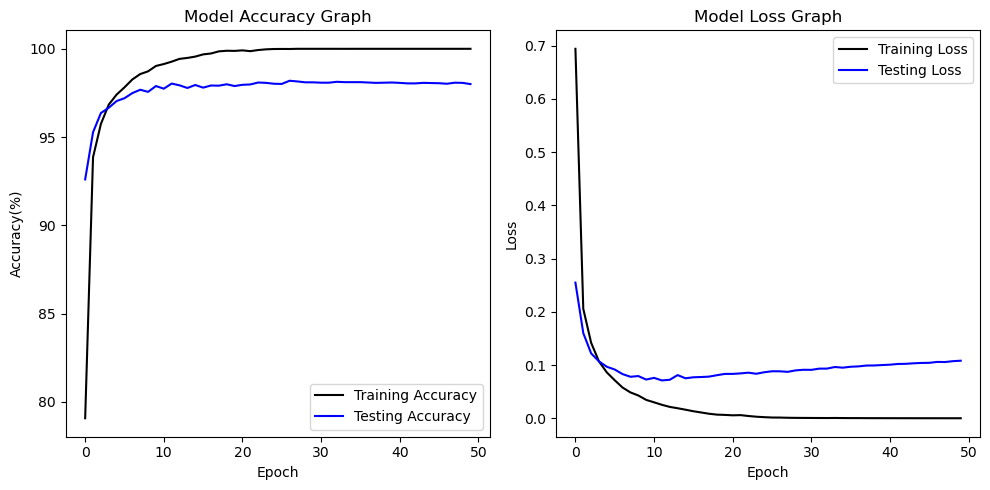

In [8]:
plt.figure(figsize=(10,5))
#Plotting the training and testing accuracy
plt.subplot(1,2,1) 
plt.plot(range(epochs),train_accuracy,color="black",label="Training Accuracy") 
plt.plot(range(epochs),test_accuracy,color="blue",label="Testing Accuracy") 
plt.xlabel("Epoch")
plt.ylabel("Accuracy(%)")
plt.title("Model Accuracy Graph")
plt.legend()
#Plotting the training and testing loss
plt.subplot(1,2,2) 
plt.plot(range(epochs),train_loss,color="black",label="Training Loss") 
plt.plot(range(epochs),test_loss,color="blue",label="Testing Loss") 
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Model Loss Graph")
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
#Saving the model
torch.save(model.state_dict(),"Multilayer_Perceptron.pth")